In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('merged2.csv')
df

,Severity_t,Start_Lat_t,Start_Lng_t,StartTime_t,EndTime_t,Distance(mi)_t,DelayFromTypicalTraffic(mins)_t,DelayFromFreeFlowSpeed(mins)_t,Congestion_Speed_t,City_t,...,Type_w,Severity_w,StartTime(UTC)_w,EndTime(UTC)_w,Precipitation(in)_w,TimeZone_w,City_w,County_w,State_w,ZipCode_w
0,1,40.114704,-92.556370,2019-10-31,2019-10-31,5.91,2,2,Fast,Kirksville,...,Snow,Light,2019-10-31,2019-10-31,0.03,US/Central,Kirksville,Adair,MO,63501
1,1,40.114704,-92.556370,2019-10-31,2019-10-31,5.91,2,2,Fast,Kirksville,...,Snow,Moderate,2019-10-31,2019-10-31,0.12,US/Central,Kirksville,Adair,MO,63501
2,1,40.114704,-92.556370,2019-10-31,2019-10-31,5.91,2,2,Fast,Kirksville,...,Snow,Light,2019-10-31,2019-10-31,0.00,US/Central,Kirksville,Adair,MO,63501
3,1,40.114704,-92.556370,2019-10-31,2019-10-31,5.91,2,2,Fast,Kirksville,...,Snow,Light,2019-10-31,2019-10-31,0.30,US/Central,Kirksville,Adair,MO,63501
4,1,40.114704,-92.556370,2019-10-31,2019-10-31,5.91,2,2,Fast,Kirksville,...,Snow,Light,2019-10-31,2019-10-31,0.02,US/Central,Kirksville,Adair,MO,63501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637429,1,39.817380,-76.840996,2019-07-05,2019-07-05,6.13,6,6,Moderate,Spring Grove,...,Rain,Light,2019-07-05,2019-07-05,0.01,US/Eastern,Spring Grove,York,PA,17362
4637430,1,39.817380,-76.840996,2019-07-05,2019-07-05,6.13,6,6,Moderate,Spring Grove,...,Rain,Light,2019-07-05,2019-07-05,0.01,US/Eastern,Spring Grove,York,PA,17362
4637431,0,33.014297,-98.948784,2022-08-10,2022-08-10,6.51,1,3,Fast,Graham,...,Rain,Light,2022-08-10,2022-08-10,0.00,US/Central,Graham,Young,TX,76450
4637432,0,33.014297,-98.948784,2022-08-10,2022-08-10,6.51,1,3,Fast,Graham,...,Rain,Light,2022-08-10,2022-08-11,0.00,US/Central,Graham,Young,TX,76450


In [3]:
def extract_datetime_info(datetime_obj):
    
    return datetime_obj.year, datetime_obj.month, datetime_obj.day

df['StartTime_t'] = pd.to_datetime(df['StartTime_t'])
df['EndTime_t'] = pd.to_datetime(df['EndTime_t'])

df[['Year', 'Month', 'Day']] = df['StartTime_t'].apply(lambda x: pd.Series(extract_datetime_info(x)))


In [4]:
df[['StartTime_t', 'EndTime_t', 'StartTime(UTC)_w', 'EndTime(UTC)_w']]


,StartTime_t,EndTime_t,StartTime(UTC)_w,EndTime(UTC)_w
0,2019-10-31,2019-10-31,2019-10-31,2019-10-31
1,2019-10-31,2019-10-31,2019-10-31,2019-10-31
2,2019-10-31,2019-10-31,2019-10-31,2019-10-31
3,2019-10-31,2019-10-31,2019-10-31,2019-10-31
4,2019-10-31,2019-10-31,2019-10-31,2019-10-31
...,...,...,...,...
4637429,2019-07-05,2019-07-05,2019-07-05,2019-07-05
4637430,2019-07-05,2019-07-05,2019-07-05,2019-07-05
4637431,2022-08-10,2022-08-10,2022-08-10,2022-08-10
4637432,2022-08-10,2022-08-10,2022-08-10,2022-08-11


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4637434 entries, 0 to 4637433
Data columns (total 34 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Severity_t                       int64         
 1   Start_Lat_t                      float64       
 2   Start_Lng_t                      float64       
 3   StartTime_t                      datetime64[ns]
 4   EndTime_t                        datetime64[ns]
 5   Distance(mi)_t                   float64       
 6   DelayFromTypicalTraffic(mins)_t  int64         
 7   DelayFromFreeFlowSpeed(mins)_t   int64         
 8   Congestion_Speed_t               object        
 9   City_t                           object        
 10  County_t                         object        
 11  State_t                          object        
 12  ZipCode_t                        int64         
 13  LocalTimeZone_t                  object        
 14  WeatherTimeStamp_t               o

In [6]:
df = df.drop_duplicates()
df.shape


(3138895, 34)

In [14]:
# # Display the DataFrame with the new 'TimeOfDay' column
# def categorize_time(hour):
#     if 5 <= hour < 12:
#         return 'Morning'
#     elif 12 <= hour < 18:
#         return 'Afternoon'
#     else:
#         return 'Night'

# # Apply the function to 'StartTime' column to create a new column 'TimeOfDay'
# df['TOD'] = df['StartTime_t'].dt.hour.apply(categorize_time)


In [8]:
# Define a function to map month to season
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create 'Season' column
df['Season'] = df['Month'].apply(categorize_season)


C:\Users\copel\AppData\Local\Temp\ipykernel_25916\1018367092.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Month'].apply(categorize_season)


In [9]:
df.columns


Index(['Severity_t', 'Start_Lat_t', 'Start_Lng_t', 'StartTime_t', 'EndTime_t',
       'Distance(mi)_t', 'DelayFromTypicalTraffic(mins)_t',
       'DelayFromFreeFlowSpeed(mins)_t', 'Congestion_Speed_t', 'City_t',
       'County_t', 'State_t', 'ZipCode_t', 'LocalTimeZone_t',
       'WeatherTimeStamp_t', 'Temperature(F)_t', 'Humidity(%)_t',
       'Pressure(in)_t', 'Visibility(mi)_t', 'WindDir_t',
       'Weather_Conditions_t', 'Type_w', 'Severity_w', 'StartTime(UTC)_w',
       'EndTime(UTC)_w', 'Precipitation(in)_w', 'TimeZone_w', 'City_w',
       'County_w', 'State_w', 'ZipCode_w', 'Year', 'Month', 'Day', 'Season'],
      dtype='object')

In [10]:
df = df.drop(['StartTime_t', 
              'EndTime_t', 
              'WeatherTimeStamp_t', 
              'Weather_Conditions_t', 
              'Type_w', 
              'Severity_w', 
              'StartTime(UTC)_w', 
              'EndTime(UTC)_w', 
              'City_w', 
              'County_w', 
              'State_w', 
              'TimeZone_w', 
              'ZipCode_w'], axis=1)


In [15]:
df.columns = ['Sev', 
              'StartLat', 
              'StartLng', 
              'Dist(mi)', 
              'DfTyp(mins)', 
              'DfFF(mins)', 
              'CongSp', 
              'City', 
              'County', 
              'State', 
              'ZipCode', 
              'TimeZone', 
              'Temp(F)', 
              'Hum(%)', 
              'Pres(in)', 
              'Vis(mi)', 
              'WindDir', 
              'Precip(in)', 
              'Year', 
              'Month', 
              'Day', 
              'Season']


In [16]:
df_clean = df.sort_values(['Year', 'Month', 'Day']).reset_index(drop=True)
df_clean

,Sev,StartLat,StartLng,Dist(mi),DfTyp(mins),DfFF(mins),CongSp,City,County,State,...,Temp(F),Hum(%),Pres(in),Vis(mi),WindDir,Precip(in),Year,Month,Day,Season
0,0,40.119274,-83.03465,1.80,0,1,Fast,Columbus,Franklin,OH,...,36.0,93,29.64,7.0,NW,0.00,2016,2,8,Winter
1,0,40.119274,-83.03465,1.80,0,1,Fast,Columbus,Franklin,OH,...,36.0,93,29.64,7.0,NW,0.02,2016,2,8,Winter
2,0,40.119274,-83.03465,1.80,0,1,Fast,Columbus,Franklin,OH,...,36.0,93,29.64,7.0,NW,0.02,2016,2,8,Winter
3,0,40.119274,-83.03465,1.80,0,1,Fast,Columbus,Franklin,OH,...,36.0,93,29.64,7.0,NW,0.03,2016,2,8,Winter
4,0,40.119274,-83.03465,1.80,0,1,Fast,Columbus,Franklin,OH,...,36.0,93,29.64,7.0,NW,0.00,2016,2,8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138890,1,37.285103,-81.25504,6.83,9,9,Moderate,Bluefield,Mercer,WV,...,69.0,73,27.05,10.0,N,0.00,2022,9,8,Fall
3138891,0,30.512320,-90.39422,1.42,1,1,Fast,Hammond,Tangipahoa,LA,...,79.0,78,29.71,7.0,N,0.00,2022,9,8,Fall
3138892,0,30.512320,-90.39422,1.42,1,1,Fast,Hammond,Tangipahoa,LA,...,79.0,78,29.71,7.0,N,0.00,2022,9,8,Fall
3138893,2,41.026596,-81.50227,3.47,4,4,Moderate,Akron,Summit,OH,...,80.0,40,28.83,10.0,VAR,0.00,2022,9,8,Fall


In [17]:
df_clean.to_csv('df_clean.csv', index=False)  

In [18]:
numerical = df_clean.select_dtypes(include='number')
numerical.columns

Index(['Sev', 'StartLat', 'StartLng', 'Dist(mi)', 'DfTyp(mins)', 'DfFF(mins)',
       'ZipCode', 'Temp(F)', 'Hum(%)', 'Pres(in)', 'Vis(mi)', 'Precip(in)',
       'Year', 'Month', 'Day'],
      dtype='object')

In [19]:
features = ['Sev', 'StartLat', 'StartLng', 'Dist(mi)', 'DfTyp(mins)', 
            'ZipCode', 'Temp(F)', 'Hum(%)', 'Pres(in)', 'Vis(mi)', 
            'Precip(in)', 'Year', 'Month', 'Day']


In [20]:
# Separating out the features
X = df_clean.loc[:, features].values

# Separating out the target
y = df_clean.loc[:,['DfFF(mins)']].values

# Standardizing the features
X = StandardScaler().fit_transform(X)
print(X.shape)

(3138895, 14)


In [21]:
pca = PCA()

principalComponents = pca.fit_transform(X)
print(principalComponents.shape)

Xpca = pca.transform(X)
print(Xpca.shape)

principalDf = pd.DataFrame(data = principalComponents, columns = features)
principalDf

(3138895, 14)
(3138895, 14)


,Sev,StartLat,StartLng,Dist(mi),DfTyp(mins),ZipCode,Temp(F),Hum(%),Pres(in),Vis(mi),Precip(in),Year,Month,Day
0,1.486426,0.529637,-1.916321,-1.349536,0.615627,0.085202,0.178047,0.499542,0.429065,1.035273,1.515090,-0.480602,-0.464648,-0.239507
1,1.489150,0.527901,-1.915798,-1.347811,0.609045,0.055404,0.187494,0.499188,0.424071,1.036457,1.515785,-0.479827,-0.463220,-0.239516
2,1.489150,0.527901,-1.915798,-1.347811,0.609045,0.055404,0.187494,0.499188,0.424071,1.036457,1.515785,-0.479827,-0.463220,-0.239516
3,1.490511,0.527034,-1.915536,-1.346948,0.605754,0.040505,0.192217,0.499011,0.421574,1.037049,1.516133,-0.479440,-0.462505,-0.239520
4,1.486426,0.529637,-1.916321,-1.349536,0.615627,0.085202,0.178047,0.499542,0.429065,1.035273,1.515090,-0.480602,-0.464648,-0.239507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138890,0.967288,-1.638085,0.003319,2.189135,-0.289773,0.656930,0.088700,1.387483,-0.595011,0.100363,-0.462355,-0.619949,-0.284927,0.240668
3138891,1.882720,0.918803,-0.145328,2.266591,-0.065871,0.069375,-0.862904,0.876251,0.684476,0.705366,-1.264122,-0.151946,0.083412,-0.387418
3138892,1.882720,0.918803,-0.145328,2.266591,-0.065871,0.069375,-0.862904,0.876251,0.684476,0.705366,-1.264122,-0.151946,0.083412,-0.387418
3138893,1.452926,-0.795868,1.110580,1.699249,0.850985,0.668352,0.117464,0.908627,-2.282180,-0.794738,-1.125023,0.082034,-0.033679,-0.328804


In [22]:
finalDf = pd.concat([principalDf, df_clean[['DfFF(mins)']]], axis = 1)
finalDf

,Sev,StartLat,StartLng,Dist(mi),DfTyp(mins),ZipCode,Temp(F),Hum(%),Pres(in),Vis(mi),Precip(in),Year,Month,Day,DfFF(mins)
0,1.486426,0.529637,-1.916321,-1.349536,0.615627,0.085202,0.178047,0.499542,0.429065,1.035273,1.515090,-0.480602,-0.464648,-0.239507,1
1,1.489150,0.527901,-1.915798,-1.347811,0.609045,0.055404,0.187494,0.499188,0.424071,1.036457,1.515785,-0.479827,-0.463220,-0.239516,1
2,1.489150,0.527901,-1.915798,-1.347811,0.609045,0.055404,0.187494,0.499188,0.424071,1.036457,1.515785,-0.479827,-0.463220,-0.239516,1
3,1.490511,0.527034,-1.915536,-1.346948,0.605754,0.040505,0.192217,0.499011,0.421574,1.037049,1.516133,-0.479440,-0.462505,-0.239520,1
4,1.486426,0.529637,-1.916321,-1.349536,0.615627,0.085202,0.178047,0.499542,0.429065,1.035273,1.515090,-0.480602,-0.464648,-0.239507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138890,0.967288,-1.638085,0.003319,2.189135,-0.289773,0.656930,0.088700,1.387483,-0.595011,0.100363,-0.462355,-0.619949,-0.284927,0.240668,9
3138891,1.882720,0.918803,-0.145328,2.266591,-0.065871,0.069375,-0.862904,0.876251,0.684476,0.705366,-1.264122,-0.151946,0.083412,-0.387418,1
3138892,1.882720,0.918803,-0.145328,2.266591,-0.065871,0.069375,-0.862904,0.876251,0.684476,0.705366,-1.264122,-0.151946,0.083412,-0.387418,1
3138893,1.452926,-0.795868,1.110580,1.699249,0.850985,0.668352,0.117464,0.908627,-2.282180,-0.794738,-1.125023,0.082034,-0.033679,-0.328804,4


In [23]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

print(explained_var_ratio)
print(cumulative_var_ratio)

[0.19986091 0.12979955 0.10935376 0.0934319  0.08221146 0.07057464
 0.0671418  0.06203481 0.05771991 0.04183452 0.03234033 0.02820216
 0.02186801 0.00362624]
[0.19986091 0.32966046 0.43901423 0.53244613 0.61465758 0.68523222
 0.75237401 0.81440882 0.87212874 0.91396326 0.94630359 0.97450575
 0.99637376 1.        ]


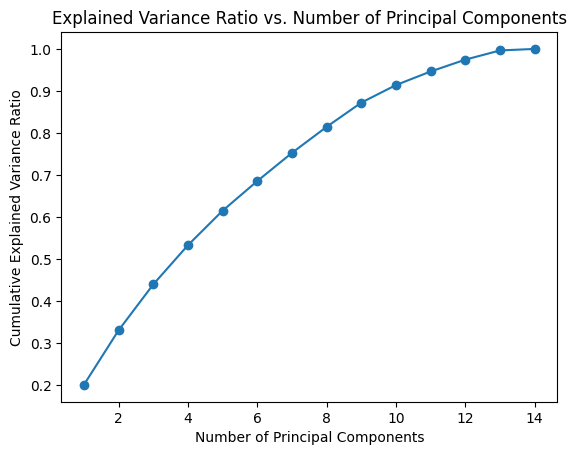

In [24]:
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


### Starting multiple linear regression

In [25]:
# Redefine X and y variables, you must run this cell before continuing regession!
X = df_clean.drop('DfFF(mins)', axis=1)
y = df_clean['DfFF(mins)']

print(X.shape)
print(y.shape)

(3138895, 21)
(3138895,)


In [26]:
#Importing the libraries
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
corr = df_clean.corr()


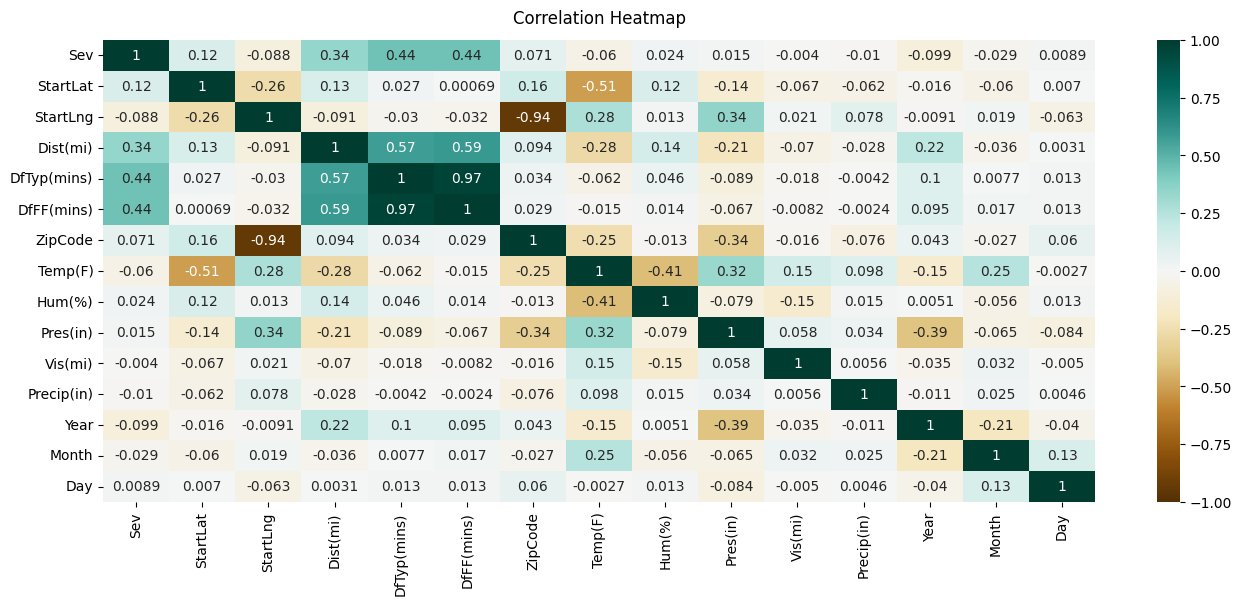

In [28]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [29]:
print('Unique values in DV:', df_clean['DfFF(mins)'].nunique())
df_clean['DfFF(mins)'].describe()

Unique values in DV: 164


count    3.138895e+06
mean     3.882809e+00
std      5.355556e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      2.700000e+02
Name: DfFF(mins), dtype: float64

<AxesSubplot: xlabel='DfFF(mins)', ylabel='Density'>

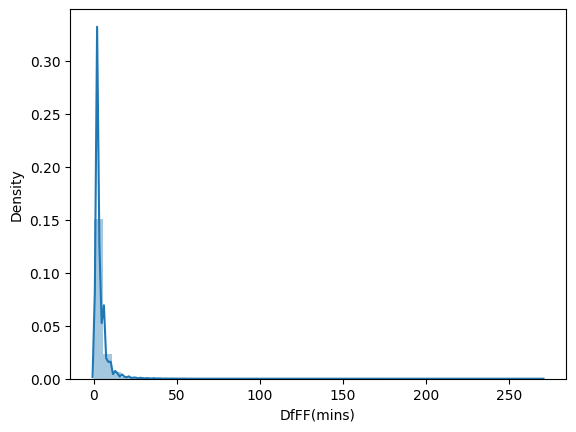

In [30]:
# I want to check the distribution of the target variable
sns.distplot(df_clean['DfFF(mins)'])

# It heavily skews positive

<AxesSubplot: xlabel='DfFF(mins)', ylabel='Density'>

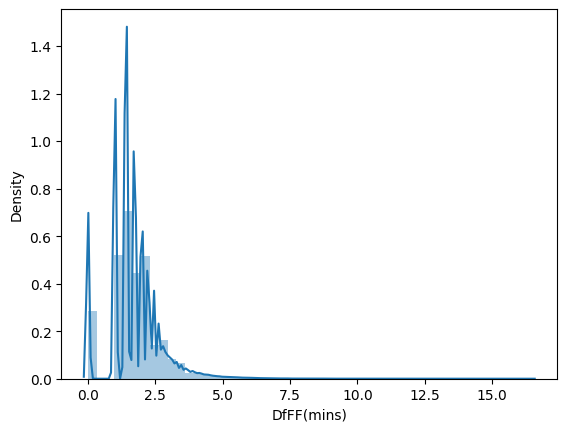

In [31]:
# Trying a sqrt-transform of the DV             
sns.distplot(np.sqrt(df_clean['DfFF(mins)']))

<AxesSubplot: xlabel='DfFF(mins)', ylabel='Density'>

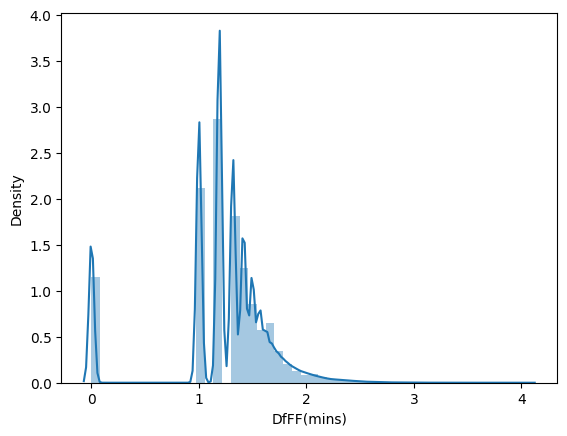

In [32]:
# Trying a double sqrt-transform of the DV             
sns.distplot(np.sqrt(np.sqrt(df_clean['DfFF(mins)'])))

<AxesSubplot: xlabel='DfFF(mins)', ylabel='Density'>

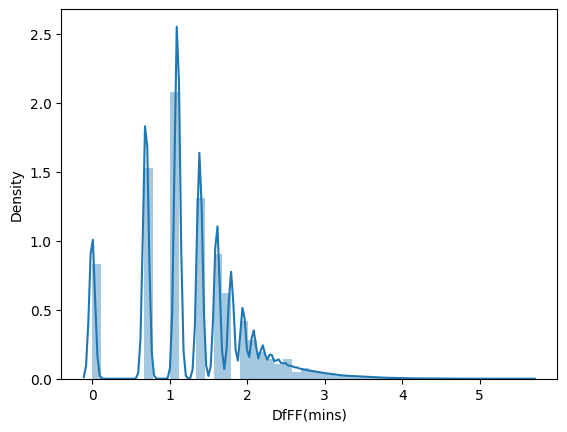

In [33]:
# Trying a log1p-transform of the DV             
sns.distplot(np.log1p(df_clean['DfFF(mins)']))

# I think this is telling us that we need to do outlier detection

In [34]:
# We have to deal with our categorical variables first. When we apply dummy variables to the datset, 
# we end up with 2,576 columns...
X = pd.get_dummies(data=X, drop_first=True)
X.head()


,Sev,StartLat,StartLng,Dist(mi),DfTyp(mins),ZipCode,Temp(F),Hum(%),Pres(in),Vis(mi),...,WindDir_South,WindDir_VAR,WindDir_Variable,WindDir_W,WindDir_WNW,WindDir_WSW,WindDir_West,Season_Spring,Season_Summer,Season_Winter
0,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,0,0,0,0,0,0,0,0,0,1
1,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,0,0,0,0,0,0,0,0,0,1
2,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,0,0,0,0,0,0,0,0,0,1
3,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,0,0,0,0,0,0,0,0,0,1
4,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Lets look at the unique values in the non-numeric columns
categorical = df.select_dtypes(exclude='number')

for column in categorical.columns:
    print(f'Unique values in column "{column}": {df[column].nunique()}')

Unique values in column "CongSp": 3
Unique values in column "City": 1488
Unique values in column "County": 1005
Unique values in column "State": 41
Unique values in column "TimeZone": 4
Unique values in column "WindDir": 24
Unique values in column "Season": 4


In [36]:
# We can drop 'City', 'County', 'State', and 'WindDir' for this analysis since these have such high cardinality
# There seems to be an issue with how we imputed TOD so we can drop that for now as well
X = df_clean.drop(['DfFF(mins)', 'City', 'County', 'State', 'WindDir'], axis=1)

X = pd.get_dummies(data=X, drop_first=True)
X.head() # This looks much more reasonable

,Sev,StartLat,StartLng,Dist(mi),DfTyp(mins),ZipCode,Temp(F),Hum(%),Pres(in),Vis(mi),...,Month,Day,CongSp_Moderate,CongSp_Slow,TimeZone_US/Eastern,TimeZone_US/Mountain,TimeZone_US/Pacific,Season_Spring,Season_Summer,Season_Winter
0,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
1,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
2,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
3,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
4,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1


In [37]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)

print(y_train.shape)
print(y_test.shape)

(2511116,)
(627779,)


In [38]:
# Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

# Printing the model coefficients
print('Intercept: ',reg_model.intercept_)

# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))


Intercept:  -20.97275102737645


[('Sev', 0.12099535159909211),
 ('StartLat', -0.016035801446389834),
 ('StartLng', -0.005731232570890814),
 ('Dist(mi)', 0.11016967962956284),
 ('DfTyp(mins)', 0.9452663346271085),
 ('ZipCode', -9.333556325236558e-06),
 ('Temp(F)', 0.010559624095348795),
 ('Hum(%)', -0.00299135212472166),
 ('Pres(in)', 0.018712432651573938),
 ('Vis(mi)', 0.015523563693890218),
 ('Precip(in)', -0.014195163701286621),
 ('Year', 0.010133984184665669),
 ('Month', -0.0037411601545722078),
 ('Day', 0.0013325794025025877),
 ('CongSp_Moderate', 0.5868690526223842),
 ('CongSp_Slow', 0.42865139219358656),
 ('TimeZone_US/Eastern', -0.056072238168783164),
 ('TimeZone_US/Mountain', 0.1647848003323445),
 ('TimeZone_US/Pacific', 0.632200093203117),
 ('Season_Spring', -0.09397841056399611),
 ('Season_Summer', -0.28025658909461676),
 ('Season_Winter', -0.048060249841929914)]

In [39]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 8.34335343 16.26666864  2.65192775 ...  2.15477382  1.75955784
  1.98692597]


In [40]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
3057257,8,8.343353
2099121,16,16.266669
3067852,3,2.651928
1690068,17,2.693840
1153112,0,-0.053800
...,...,...
2186868,3,3.975727
1022974,2,1.932492
256218,1,2.154774
3104813,2,1.759558


In [41]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.6490029325683688
Mean Square Error: 1.7667439725107412
Root Mean Square Error: 1.3291892162181955


In [42]:
# Retrying with statsmodel to compare
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [43]:
lm = sm.OLS(y, X).fit()

In [44]:
lm.summary() # We get very similar coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             DfFF(mins)   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          3.955e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        10:27:11   Log-Likelihood:                     -5.1146e+06
No. Observations:             3138895   AIC:                                  1.023e+07
Df Residuals:                 3138873   BIC:                                  1.023e+07
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Sev                      0.1212      0.001    111.624      0.000       0.119       0.123
StartLat                -0.0163      0.000    -93.043      0.000      -0.017      -0.016
StartLng                -0.0053      0.000    -22.571      0.000      -0.006      -0.005
Dist(mi)                 0.1096      0.000    509.850      0.000       0.109       0.110
DfTyp(mins)              0.9454      0.000   5065.280      0.000       0.945       0.946
ZipCode              -9.128e-06    9.4e-08    -97.118      0.000   -9.31e-06   -8.94e-06
Temp(F)                  0.0114   5.99e-05    190.792      0.000       0.011       0.012
Hum(%)                  -0.0043   4.58e-05    -94.884      0.000      -0.004      -0.004
Pres(in)                 0.0167      0.000     41.069      0.000       0.016       0.018
Vis(mi)                  0.0008   5.01e-05     15.605      0.000       0.001       0.001
Precip(in)              -0.0150      0.001    -13.062      0.000      -0.017      -0.013
Year                    -0.0001   1.21e-05    -10.353      0.000      -0.000      -0.000
Month                   -0.0044      0.000    -19.630      0.000      -0.005      -0.004
Day                      0.0012   8.31e-05     14.648      0.000       0.001       0.001
CongSp_Moderate          0.5909      0.002    329.930      0.000       0.587       0.594
CongSp_Slow              0.4374      0.002    188.970      0.000       0.433       0.442
TimeZone_US/Eastern     -0.0582      0.003    -17.571      0.000      -0.065      -0.052
TimeZone_US/Mountain     0.1614      0.003     46.284      0.000       0.155       0.168
TimeZone_US/Pacific      0.6337      0.005    125.946      0.000       0.624       0.644
Season_Spring           -0.0943      0.003    -35.878      0.000      -0.099      -0.089
Season_Summer           -0.2839      0.003    -98.806      0.000      -0.290      -0.278
Season_Winter           -0.0459      0.002    -18.492      0.000      -0.051      -0.041
==============================================================================
Omnibus:                  4148927.254   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1786770251.943
Skew:                           7.245   Prob(JB):                         0.00
Kurtosis:                     118.981   Cond. No.                     6.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.18e+05. This might indicate that there are
strong mul

### Outlier Detection

In [45]:
numerical = df_clean.select_dtypes(include='number')
numerical.columns

Index(['Sev', 'StartLat', 'StartLng', 'Dist(mi)', 'DfTyp(mins)', 'DfFF(mins)',
       'ZipCode', 'Temp(F)', 'Hum(%)', 'Pres(in)', 'Vis(mi)', 'Precip(in)',
       'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
for col in numerical.columns:
    print('Highest allowed', df_clean[col].mean() + 3 * df_clean[col].std())
    print('Lowest allowed', df_clean[col].mean() - 3 * df_clean[col].std())
                                                    
    sns.boxplot(df_clean[col])
    plt.show()


In [48]:
for col in numerical.columns:
    q1, q3= np.percentile(df_clean[col], [25, 75]) # get percentiles
    iqr = q3 - q1 # the IQR value
    lower_bound = q1 - (1.5 * iqr) # lower bound
    upper_bound = q3 + (1.5 * iqr) # upper bound

    print(col, ': ', np.sum(df_clean[col] > upper_bound)) # how many datapoints are above the upper bound?

Sev :  17
StartLat :  0
StartLng :  0
Dist(mi) :  148152
DfTyp(mins) :  233415
DfFF(mins) :  154334
ZipCode :  0
Temp(F) :  6
Hum(%) :  0
Pres(in) :  8
Vis(mi) :  276
Precip(in) :  334974
Year :  0
Month :  0
Day :  0


In [49]:
new_df = df_clean.copy()

for col in numerical.columns:
    q1, q3= np.percentile(new_df[col], [25, 75]) # get percentiles
    iqr = q3 - q1 # the IQR value
    lower_bound = q1 - (1.5 * iqr) # lower bound
    upper_bound = q3 + (1.5 * iqr) # upper bound

    new_df = new_df[new_df[col] < upper_bound] # remove the outliers
    new_df = new_df[new_df[col] > lower_bound] # remove the outliers

new_df.shape

(1918796, 22)

(1918796, 22)

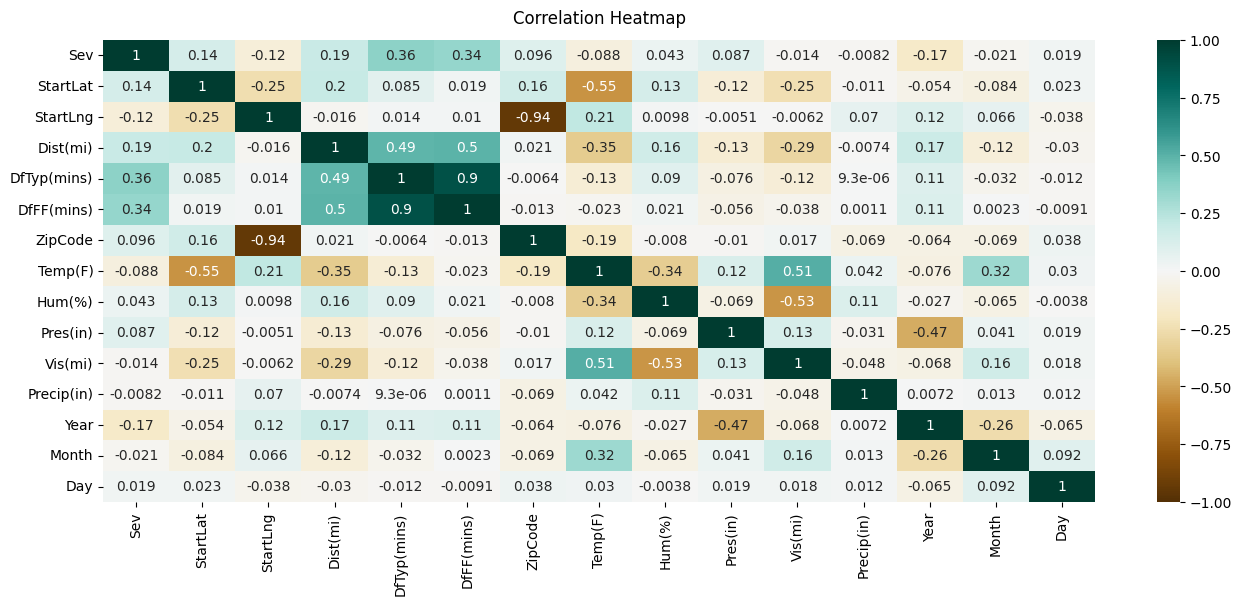

In [51]:
corr = new_df.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot: xlabel='DfFF(mins)', ylabel='Density'>

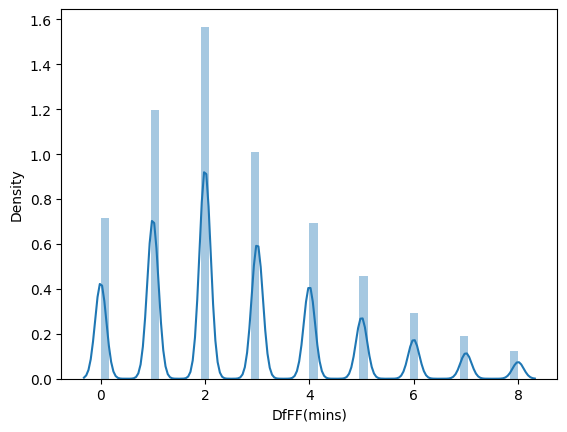

In [50]:
sns.distplot(new_df['DfFF(mins)'])


<AxesSubplot: xlabel='DfFF(mins)', ylabel='Density'>

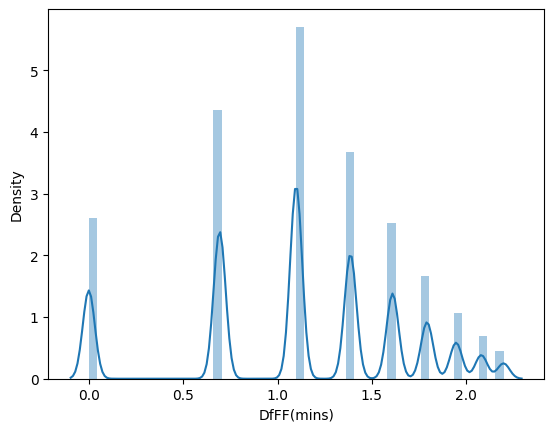

In [52]:
sns.distplot(np.log1p(new_df['DfFF(mins)']))


In [56]:
X_new = new_df.drop('DfFF(mins)', axis=1)
y_new = new_df['DfFF(mins)']

print(X_new.shape)
print(y_new.shape)

(1918796, 21)
(1918796,)


In [58]:
X_new = new_df.drop(['DfFF(mins)', 'City', 'County', 'State', 'WindDir'], axis=1)


X_new = pd.get_dummies(data=X_new, drop_first=True)
X_new.head()

,Sev,StartLat,StartLng,Dist(mi),DfTyp(mins),ZipCode,Temp(F),Hum(%),Pres(in),Vis(mi),...,Month,Day,CongSp_Moderate,CongSp_Slow,TimeZone_US/Eastern,TimeZone_US/Mountain,TimeZone_US/Pacific,Season_Spring,Season_Summer,Season_Winter
0,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
1,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
2,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
3,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1
4,0,40.119274,-83.03465,1.8,0,43235,36.0,93,29.64,7.0,...,2,8,0,0,1,0,0,0,0,1


In [60]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 666)

print(y_train.shape)
print(y_test.shape)

(2511116,)
(627779,)


In [61]:
lm_new = sm.OLS(y_new, X_new).fit()

In [62]:
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             DfFF(mins)   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                          1.475e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:26:37   Log-Likelihood:                     -2.2305e+06
No. Observations:             1918796   AIC:                                  4.461e+06
Df Residuals:                 1918774   BIC:                                  4.461e+06
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Sev                      0.0725      0.001     77.567      0.000       0.071       0.074
StartLat                -0.0110      0.000    -79.488      0.000      -0.011      -0.011
StartLng                -0.0002      0.000     -1.250      0.211      -0.001       0.000
Dist(mi)                 0.1417      0.000    472.303      0.000       0.141       0.142
DfTyp(mins)              0.8221      0.000   2240.893      0.000       0.821       0.823
ZipCode              -4.931e-06   7.32e-08    -67.383      0.000   -5.07e-06   -4.79e-06
Temp(F)                  0.0088   4.88e-05    179.724      0.000       0.009       0.009
Hum(%)                  -0.0031   5.24e-05    -59.060      0.000      -0.003      -0.003
Pres(in)                -0.0187      0.001    -20.766      0.000      -0.020      -0.017
Vis(mi)                  0.0134      0.000     73.165      0.000       0.013       0.014
Precip(in)              -0.0208      0.010     -2.107      0.035      -0.040      -0.001
Year                     0.0005   1.71e-05     28.592      0.000       0.000       0.001
Month                    0.0016      0.000      8.999      0.000       0.001       0.002
Day                      0.0002   6.69e-05      3.192      0.001    8.24e-05       0.000
CongSp_Moderate          0.4806      0.001    326.831      0.000       0.478       0.483
CongSp_Slow              0.3533      0.002    181.842      0.000       0.349       0.357
TimeZone_US/Eastern     -0.0517      0.002    -20.930      0.000      -0.057      -0.047
TimeZone_US/Mountain     0.0451      0.003     15.062      0.000       0.039       0.051
TimeZone_US/Pacific      0.4498      0.004    108.803      0.000       0.442       0.458
Season_Spring           -0.0632      0.002    -29.066      0.000      -0.067      -0.059
Season_Summer           -0.2081      0.002    -90.268      0.000      -0.213      -0.204
Season_Winter           -0.0092      0.002     -4.389      0.000      -0.013      -0.005
==============================================================================
Omnibus:                  1084378.510   Durbin-Watson:                   0.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12403171.057
Skew:                           2.523   Prob(JB):                         0.00
Kurtosis:                      14.387   Cond. No.                     1.19e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.19e+06. This might indicate that there are
strong mul

In [63]:
log_y_new = np.log1p(y_new)

In [64]:
log_lm_new = sm.OLS(log_y_new, X_new).fit()

In [66]:
log_lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             DfFF(mins)   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                          1.711e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:29:57   Log-Likelihood:                     -2.9022e+05
No. Observations:             1918796   AIC:                                  5.805e+05
Df Residuals:                 1918774   BIC:                                  5.808e+05
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Sev                     -0.0230      0.000    -67.513      0.000      -0.024      -0.022
StartLat                -0.0038   5.01e-05    -75.952      0.000      -0.004      -0.004
StartLng                 0.0022      7e-05     31.337      0.000       0.002       0.002
Dist(mi)                 0.0553      0.000    506.706      0.000       0.055       0.056
DfTyp(mins)              0.2242      0.000   1680.060      0.000       0.224       0.224
ZipCode              -1.227e-06   2.66e-08    -46.089      0.000   -1.28e-06   -1.17e-06
Temp(F)                  0.0023   1.78e-05    129.714      0.000       0.002       0.002
Hum(%)                  -0.0012   1.91e-05    -62.046      0.000      -0.001      -0.001
Pres(in)                -0.0319      0.000    -97.694      0.000      -0.033      -0.031
Vis(mi)                  0.0022   6.68e-05     33.574      0.000       0.002       0.002
Precip(in)               0.0098      0.004      2.717      0.007       0.003       0.017
Year                     0.0009   6.21e-06    142.049      0.000       0.001       0.001
Month                   -0.0007   6.52e-05    -11.485      0.000      -0.001      -0.001
Day                     -0.0003   2.43e-05    -11.174      0.000      -0.000      -0.000
CongSp_Moderate          0.1033      0.001    193.034      0.000       0.102       0.104
CongSp_Slow             -0.0026      0.001     -3.629      0.000      -0.004      -0.001
TimeZone_US/Eastern     -0.0221      0.001    -24.599      0.000      -0.024      -0.020
TimeZone_US/Mountain     0.0330      0.001     30.329      0.000       0.031       0.035
TimeZone_US/Pacific      0.2004      0.002    133.232      0.000       0.197       0.203
Season_Spring           -0.0294      0.001    -37.204      0.000      -0.031      -0.028
Season_Summer           -0.0650      0.001    -77.484      0.000      -0.067      -0.063
Season_Winter           -0.0091      0.001    -11.907      0.000      -0.011      -0.008
==============================================================================
Omnibus:                   122610.422   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           312495.107
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.827   Cond. No.                     1.19e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.19e+06. This might indicate that there are
strong mul

### Lasso Regression



In [67]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(Xn_train)
X_test_scaled = sc.transform(Xn_test)

In [68]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

#Initialize lasso regression model
model = Lasso(max_iter=10000) #default alpha is 1
model.fit(X_train_scaled, yn_train)

y_pred = model.predict(X_test_scaled)

#Calculate R-squared
rsquared = r2_score(yn_test, y_pred)
print(f"R-squared: {rsquared}")

#Calculate the mean squared error
mse = mean_squared_error(yn_test, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.5342691426583214
Mean Squared Error: 1.74024216716611


Text(0.5, 1.0, 'Coefficient values with increasing values of alpha')

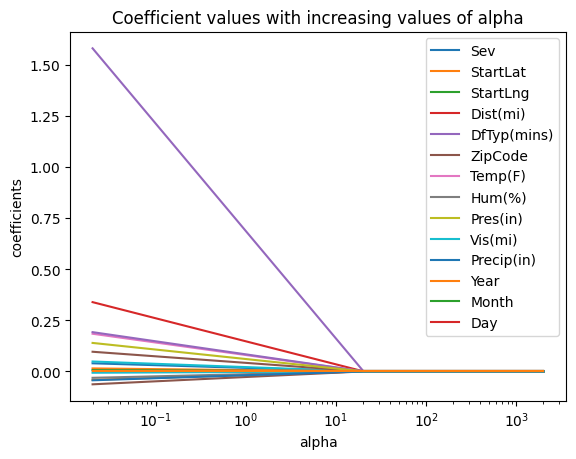

In [71]:
alphas = np.linspace(0.01, 1000, 100)
coefs = []

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, yn_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.legend(features)
ax.grid(False)
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title("Coefficient values with increasing values of alpha")


In [72]:
coeff = pd.Series(model.coef_, index=X_new.columns)
coeff

Sev                     0.0
StartLat                0.0
StartLng                0.0
Dist(mi)                0.0
DfTyp(mins)             0.0
ZipCode                -0.0
Temp(F)                -0.0
Hum(%)                  0.0
Pres(in)               -0.0
Vis(mi)                -0.0
Precip(in)              0.0
Year                    0.0
Month                   0.0
Day                    -0.0
CongSp_Moderate         0.0
CongSp_Slow            -0.0
TimeZone_US/Eastern     0.0
TimeZone_US/Mountain   -0.0
TimeZone_US/Pacific     0.0
Season_Spring          -0.0
Season_Summer           0.0
Season_Winter           0.0
dtype: float64

In [74]:
from sklearn.model_selection import GridSearchCV

alphas = {"alpha": 10.0 ** np.arange(-5, 6)}
grid_search = GridSearchCV(model, alphas, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, yn_train)

print(f"Best value for lambda : ", grid_search.best_params_)
print("Best score for cost function: ", grid_search.best_score_)
